# Working with several networks

When one single network isn't enough.

---

- Website: https://discovery.gitlabpages.inria.fr/enoslib/index.html
- Instant chat: https://framateam.org/enoslib
- Source code: https://gitlab.inria.fr/discovery/enoslib

---

**Prerequisites:**
- A Grid'5000 account
- A working EnOSlib environment and Jupyter (not included in EnOSlib dependencies, but `pip install jupyterlab` will install it)




## Setup

In [1]:
import enoslib as en

# Enable rich logging
_ = en.init_logging()

Note: Openstack clients not installed


We reserve two nodes (with at least two network interfaces), the first network interface of each node will use the production network of Grid'5000 (not isolated network) while a second network interface will be configured to use a Vlan.

- To find out which machine have at least two network cards, you can refer to the [hardware page of Grid'5000](https://www.grid5000.fr/w/Hardware)
- To know more about Vlans on Grid'5000, you can refer to this [page](https://www.grid5000.fr/w/KaVLAN)

<div class="alert alert-block alert-warning">
Beware: the number of VLAN is limited. Here we want a routed vlans and there are only 6 routed vlan per sites (3 are monosite and 3 are multisite) 
</div>

In [2]:
SITE = "rennes"

network = en.G5kNetworkConf(type="prod", roles=["public"], site=SITE)
private = en.G5kNetworkConf(type="kavlan", roles=["private"], site=SITE)

conf = (
    en.G5kConf.from_settings(job_name="enoslib_several_networks")
        .add_network_conf(network)
        .add_network_conf(private)
        .add_machine(
            roles=["server", "xp"],
            cluster="paravance",
            nodes=1,
            primary_network=network,
            secondary_networks=[private],
        )
        .add_machine(
            roles=["client", "xp"],
            cluster="paravance",
            nodes=1,
            primary_network=network,
            secondary_networks=[private],
        )
        .finalize()
)
conf

Conf@0x7fa880dc5f70
{
    "dhcp": true,
    "force_deploy": false,
    "env_name": "debian11-x64-nfs",
    "job_name": "enoslib_several_networks",
    "job_type": [
        "deploy"
    ],
    "key": "/home/msimonin/.ssh/id_rsa.pub",
    "queue": "default",
    "walltime": "02:00:00",
    "resources": {
        "machines": [
            {
                "roles": [
                    "server",
                    "xp"
                ],
                "primary_network": "4bc9d6eb-afac-4e46-926e-993ca287c7ae",
                "secondary_networks": [
                    "3ab60c20-4fe2-4ca2-9113-b6a42bae85c9"
                ],
                "cluster": "paravance",
                "nodes": 1
            },
            {
                "roles": [
                    "client",
                    "xp"
                ],
                "primary_network": "4bc9d6eb-afac-4e46-926e-993ca287c7ae",
                "secondary_networks": [
                    "3ab60c20-4fe2-4ca2-9113-b6a42bae85c9"
                ],
                "cluster": "paravance",
                "nodes": 1
            }
        ],
        "networks": [
            {
                "id": "4bc9d6eb-afac-4e46-926e-993ca287c7ae",
                "type": "prod",
                "roles": [
                    "public"
                ],
                "site": "rennes"
            },
            {
                "id": "3ab60c20-4fe2-4ca2-9113-b6a42bae85c9",
                "type": "kavlan",
                "roles": [
                    "private"
                ],
                "site": "rennes"
            }
        ]
    }
}

In [3]:
provider = en.G5k(conf)
roles, networks = provider.init()
roles

INFO     Reloading enoslib_several_networks from grenoble                ]8;id=866878;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py\g5k_api_utils.py]8;;\:]8;id=414763;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py#175\175]8;;\

INFO     Reloading enoslib_several_networks from lille                   ]8;id=700790;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py\g5k_api_utils.py]8;;\:]8;id=283804;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py#175\175]8;;\

INFO     Reloading enoslib_several_networks from luxembourg              ]8;id=779614;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py\g5k_api_utils.py]8;;\:]8;id=45424;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py#175\175]8;;\

INFO     Reloading enoslib_several_networks from lyon                    ]8;id=741194;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py\g5k_api_utils.py]8;;\:]8;id=985284;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py#175\175]8;;\

INFO     Reloading enoslib_several_networks from nantes                  ]8;id=741012;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py\g5k_api_utils.py]8;;\:]8;id=121955;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py#175\175]8;;\

INFO     Reloading enoslib_several_networks from rennes                  ]8;id=132085;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py\g5k_api_utils.py]8;;\:]8;id=295757;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py#175\175]8;;\

INFO     Reloading 1870628 from rennes                                   ]8;id=801830;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py\g5k_api_utils.py]8;;\:]8;id=576844;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py#180\180]8;;\

INFO     Reloading enoslib_several_networks from sophia                  ]8;id=571478;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py\g5k_api_utils.py]8;;\:]8;id=867608;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py#175\175]8;;\

INFO     Waiting for 1870628 on rennes [2022-01-18 15:26:51]             ]8;id=289497;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py\g5k_api_utils.py]8;;\:]8;id=143417;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py#317\317]8;;\

INFO     All jobs are Running !                                          ]8;id=363596;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py\g5k_api_utils.py]8;;\:]8;id=133241;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py#324\324]8;;\

{'server': [Host(address='paravance-16.rennes.grid5000.fr', alias='paravance-16.rennes.grid5000.fr', user='root', keyfile=None, port=None, extra={}, net_devices=set())], 'xp': [Host(address='paravance-16.rennes.grid5000.fr', alias='paravance-16.rennes.grid5000.fr', user='root', keyfile=None, port=None, extra={}, net_devices=set()), Host(address='paravance-18.rennes.grid5000.fr', alias='paravance-18.rennes.grid5000.fr', user='root', keyfile=None, port=None, extra={}, net_devices=set())], 'client': [Host(address='paravance-18.rennes.grid5000.fr', alias='paravance-18.rennes.grid5000.fr', user='root', keyfile=None, port=None, extra={}, net_devices=set())]}

## Get the network information of your nodes

First we retrieve the network information by syncing the Host descriptions with the remote machines.
Syncing the information will populate every single Host datastructure with some actual information (e.g. number of cores, network information).
This relies on Ansible fact gathering and is provider agnostic. 
Note that Grid'5000 provides a lot of node information in its [REST API](https://api.grid5000.fr) (but provides only static information)

In [4]:
roles = en.sync_info(roles, networks)
roles

[WARNING]: No inventory was parsed, only implicit localhost is available


Output()

Finished 1 tasks (hostname)

─────────────────────────────────────────────────────────────────────────────────────────────

Output()

Finished 6 tasks (Gathering Facts,setup,utils : include,utils : Dump network information in a
file,utils : Create the fake interfaces)

─────────────────────────────────────────────────────────────────────────────────────────────

ip
127.0.0.1/8
::1/128
ip
fe80::eef4:bbff:fed1:138/64
172.16.96.16/20
ip
fe80::20a0:9cff:fe86:3415/64
ip
fe80::eef4:bbff:fed1:13a/64
10.24.6.16/18


We can now filter the network addresses of the nodes given a network

In [5]:
server = roles["server"][0]
server.filter_addresses(networks=networks["private"])

[IPAddress(network=<enoslib.infra.enos_g5k.objects.G5kEnosVlan4Network object at 0x7fa880585f70>, ip=IPv4Interface('10.24.6.16/18'))]

In [6]:
ip_address = server.filter_addresses(networks=networks["private"])[0]
str(ip_address.ip.ip)

'10.24.6.16'

In [7]:
server.filter_addresses(networks=networks["public"])

[IPAddress(network=<enoslib.infra.enos_g5k.objects.G5kEnosProd4Network object at 0x7fa880405eb0>, ip=IPv4Interface('172.16.96.16/20'))]

## A simple load generation tool

We are using [flent](https://flent.org/), a convenient client to netperf that is able to play different network benchmarks.

Roughly speaking, Flent connects to a Netperf server, starts a benchmark and collect metrics in various format (csv, images ... ).
That makes a good candidates when you need to get a quick insight into the performance of the network between your nodes

The goal of this part is to initiate a benchmark of TCP traffic on the `private` network. So we need to instruct `flent` to connect to the `netperf` server on the relevant address.

In [8]:
with en.actions(roles=roles) as a:
    a.apt_repository(
        repo="deb http://deb.debian.org/debian stretch main contrib non-free",
        state="present",
    )
    a.apt(
        name=["flent", "netperf", "python3-setuptools", "python3-matplotlib"],
        state="present",
    )

Output()

Finished 2 tasks (apt_repository,apt)

─────────────────────────────────────────────────────────────────────────────────────────────

---
Checking the routes on the nodes. Make sure the `private` network goes through the `private` interface.

In [9]:
routes = en.run_command("ip route list", roles=roles)
print("\n-Routes-\n")
print("\n\n".join([f"{r.host} => {r.stdout}" for r in routes]))

Output()

Finished 1 tasks (ip route list)

─────────────────────────────────────────────────────────────────────────────────────────────


-Routes-

paravance-18.rennes.grid5000.fr => default via 172.16.111.254 dev eno1 
10.24.0.0/18 dev eno2 proto kernel scope link src 10.24.6.18 
172.16.96.0/20 dev eno1 proto kernel scope link src 172.16.96.18 

paravance-16.rennes.grid5000.fr => default via 172.16.111.254 dev eno1 
10.24.0.0/18 dev eno2 proto kernel scope link src 10.24.6.16 
172.16.96.0/20 dev eno1 proto kernel scope link src 172.16.96.16 


In [10]:
server_address = str(server.filter_addresses(networks=networks["private"])[0].ip.ip)

with en.actions(pattern_hosts="server", roles=roles) as a:
    a.shell("netperf", background=True) # this is somehow idempotent .. will fail silently if netperf is already started
    a.wait_for(port=12865, state="started", task_name="Waiting for netperf to be ready")
    

with en.actions(pattern_hosts="client", roles=roles) as a:
    a.shell(
        " flent tcp_upload -p totals "
        " -l 60 "
        f" -H { server_address } "
        " -t 'tcp_upload test' "
        " -o result.png"
    )
    a.fetch(src="result.png", dest="result")

Output()

Finished 2 tasks (netperf,Waiting for netperf to be ready)

─────────────────────────────────────────────────────────────────────────────────────────────

Output()

Finished 2 tasks ( flent tcp_upload -p totals  -l 60  -H 10.24.6.16  -t 'tcp_upload test'  -o
result.png,fetch)

─────────────────────────────────────────────────────────────────────────────────────────────

In [17]:
with en.actions(pattern_hosts="client", roles=roles) as a:
    a.fetch(src="result.png", dest="/tmp/result")
    r = a.results
r

Output()

Finished 1 tasks (fetch)

─────────────────────────────────────────────────────────────────────────────────────────────

host,task,status,payload
paravance-18.rennes.grid5000.fr,fetch,OK,[360 bytes]


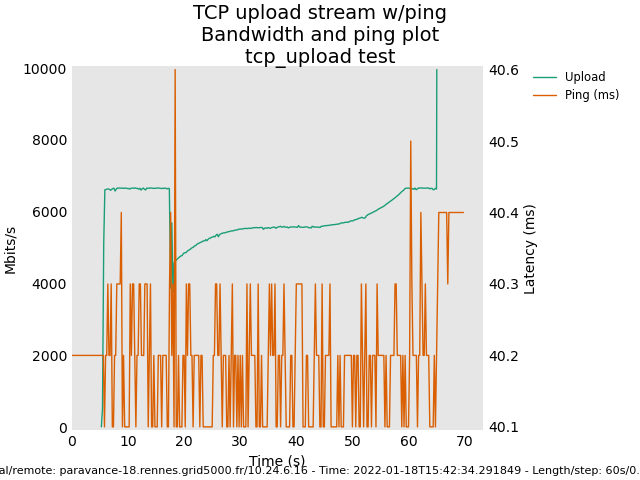

In [18]:
from IPython.display import Image
Image(f"/tmp/result/{roles['client'][0].alias}/result.png")

---
Forcing the flent client to be bound on the right network (not really necessary if the routes are set correctly).
It's an opportunity to use host variables so let's do it ;)

`flent` has an option for this `--local-bind <ip>`

In [19]:
for h in roles["client"]:
    h.extra.update({"local_bind": h.filter_addresses(networks=networks["private"])[0].ip.ip})
roles["client"][0]

ip
127.0.0.1/8
::1/128
ip
fe80::eef4:bbff:fed1:2e8/64
172.16.96.18/20
ip
fe80::a857:5cff:fe04:f409/64
ip
fe80::eef4:bbff:fed1:2ea/64
10.24.6.18/18


In [22]:
server_address = str(server.filter_addresses(networks=networks["private"])[0].ip.ip)

with en.actions(pattern_hosts="server", roles=roles) as a:
    a.shell("netperf", background=True) # this is somehow idempotent .. will fail silently if netperf is already started
    a.wait_for(port=12865, state="started", task_name="Waiting for netperf to be ready")
    

with en.actions(pattern_hosts="client", roles=roles) as a:
    a.shell(
        " flent tcp_upload -p totals "
        " -l 60 "
        f" -H { server_address } "
        "--local-bind {{ local_bind }} "
        " -t 'tcp_upload test' "
        " -o result_bind.png"
    )
    a.fetch(src="result_bind.png", dest="/tmp/result")

Output()

Finished 2 tasks (netperf,Waiting for netperf to be ready)

─────────────────────────────────────────────────────────────────────────────────────────────

Output()

Finished 3 tasks ( flent tcp_upload -p totals  -l 60  -H 10.24.6.16 --local-bind {{ 
local_bind }}  -t 'tcp_upload test'  -o result_bind.png,fetch)

─────────────────────────────────────────────────────────────────────────────────────────────

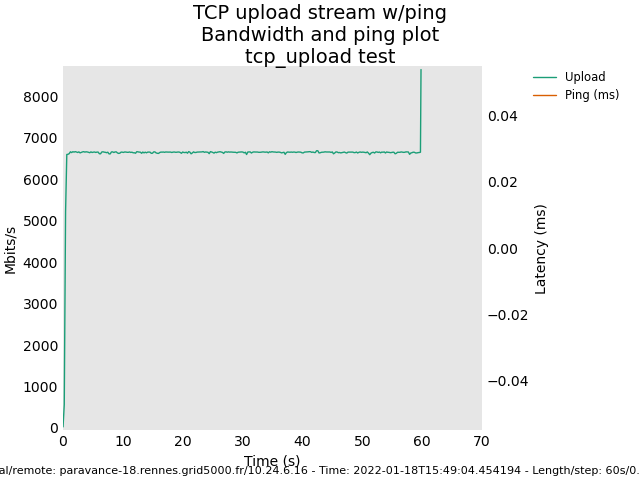

In [23]:
from IPython.display import Image
Image(f"/tmp/result/{roles['client'][0].alias}/result_bind.png")

## Checking that the network traffic flows through the right interface :)

In [24]:
# we enable the statistics on all known interfaces
# note that this seems incompatible with --epoch :( :(
with en.Dstat(nodes=roles["xp"], options="--full") as d:
    backup_dir = d.backup_dir
    with en.actions(pattern_hosts="server", roles=roles) as a:
        a.shell("netperf", background=True) # this is somehow idempotent .. will fail silently if netperf is already started
        a.wait_for(port=12865, state="started", task_name="Waiting for netperf to be ready")


    with en.actions(pattern_hosts="client", roles=roles) as a:
        a.shell(
            " flent tcp_upload -p totals "
            " -l 60 "
            f" -H { server_address } "
            "--local-bind {{ local_bind }} "
            " -t 'tcp_upload test' "
            " -o result_bind.png"
        )
        a.fetch(src="result_bind.png", dest="result")

Output()

Finished 1 tasks ((tmux list-panes -t __enoslib_dstat__ -F '#{pane_pid}' | xargs -n1 kill -2)
|| true)

─────────────────────────────────────────────────────────────────────────────────────────────

Output()

Finished 4 tasks (apt,file,get_url,Running dstat with the options --full -o 
1642517421339346366-dstat.csv)

─────────────────────────────────────────────────────────────────────────────────────────────

Output()

Finished 2 tasks (netperf,Waiting for netperf to be ready)

─────────────────────────────────────────────────────────────────────────────────────────────

Finished 3 tasks ( flent tcp_upload -p totals  -l 60  -H 10.24.6.16 --local-bind {{ 
local_bind }}  -t 'tcp_upload test'  -o result_bind.png,fetch)

─────────────────────────────────────────────────────────────────────────────────────────────

Finished 1 tasks ((tmux list-panes -t __enoslib_dstat__ -F '#{pane_pid}' | xargs -n1 kill -2)
|| true)

─────────────────────────────────────────────────────────────────────────────────────────────

Output()

Finished 1 tasks (Fetching the dstat output)

─────────────────────────────────────────────────────────────────────────────────────────────

In [25]:
import pandas as pd
import seaborn as sns 

print(backup_dir)

# create a dictionnary: host -> pd.DataFrame
results = dict()
for host in roles["xp"]:
    result = pd.DataFrame()
    host_dir = backup_dir / host.alias
    csvs = host_dir.rglob("*.csv")
    for csv in csvs:
        print(csv)
        df = pd.read_csv(csv, skiprows=5, index_col=False)
        df["host"] = host.alias
        df["csv"] = csv
        result = pd.concat([result, df], axis=0)
    results[host] = result

/home/msimonin/workspace/repos/enoslib/docs/jupyter/__enoslib_dstat__/1642517421339346366

/home/msimonin/workspace/repos/enoslib/docs/jupyter/__enoslib_dstat__/1642517421339346366/par
avance-16.rennes.grid5000.fr/tmp/__enoslib_dstat__/1642517421339346366/1642517421339346366-ds
tat.csv

/home/msimonin/workspace/repos/enoslib/docs/jupyter/__enoslib_dstat__/1642517421339346366/par
avance-18.rennes.grid5000.fr/tmp/__enoslib_dstat__/1642517421339346366/1642517421339346366-ds
tat.csv

In [26]:
results[roles["xp"][0]]

,usr,sys,idl,wai,stl,dsk/sda:read,dsk/sda:writ,dsk/sdb:read,dsk/sdb:writ,net/eno1:recv,...,net/eno2:recv,net/eno2:send,net/ifb1:recv,net/ifb1:send,1m,5m,15m,time,host,csv
0,0.489,0.474,98.723,0.315,0,201834.19,1392592.119,129.154,0,0,...,0,0,0,0,0.48,0.30,0.26,Jan-18 15:50:30,paravance-16.rennes.grid5000.fr,/home/msimonin/workspace/repos/enoslib/docs/ju...
1,0.031,0.125,99.844,0.000,0,0.00,0.000,0.000,0,104004,...,0,0,0,0,0.44,0.30,0.25,Jan-18 15:50:31,paravance-16.rennes.grid5000.fr,/home/msimonin/workspace/repos/enoslib/docs/ju...
2,1.189,1.752,96.997,0.063,0,8192.00,0.000,0.000,0,129712,...,0,0,0,0,0.44,0.30,0.25,Jan-18 15:50:32,paravance-16.rennes.grid5000.fr,/home/msimonin/workspace/repos/enoslib/docs/ju...
3,1.598,3.886,94.140,0.376,0,4096.00,1167360.000,0.000,0,79156,...,0,0,0,0,0.44,0.30,0.25,Jan-18 15:50:33,paravance-16.rennes.grid5000.fr,/home/msimonin/workspace/repos/enoslib/docs/ju...
4,0.971,4.103,94.895,0.031,0,0.00,155648.000,0.000,0,60,...,0,0,0,0,0.44,0.30,0.25,Jan-18 15:50:34,paravance-16.rennes.grid5000.fr,/home/msimonin/workspace/repos/enoslib/docs/ju...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.000,0.000,100.000,0.000,0,0.00,0.000,0.000,0,0,...,0,0,0,0,0.47,0.37,0.28,Jan-18 15:51:49,paravance-16.rennes.grid5000.fr,/home/msimonin/workspace/repos/enoslib/docs/ju...
80,0.000,0.000,100.000,0.000,0,0.00,0.000,0.000,0,60,...,0,0,0,0,0.47,0.37,0.28,Jan-18 15:51:50,paravance-16.rennes.grid5000.fr,/home/msimonin/workspace/repos/enoslib/docs/ju...
81,0.000,0.000,100.000,0.000,0,0.00,0.000,0.000,0,60,...,0,0,0,0,0.47,0.37,0.28,Jan-18 15:51:51,paravance-16.rennes.grid5000.fr,/home/msimonin/workspace/repos/enoslib/docs/ju...
82,0.094,0.094,99.781,0.031,0,8192.00,0.000,0.000,0,14763,...,0,0,0,0,0.43,0.36,0.28,Jan-18 15:51:52,paravance-16.rennes.grid5000.fr,/home/msimonin/workspace/repos/enoslib/docs/ju...


['net/eno1:recv', 'net/eno1:send', 'net/eno2:recv', 'net/eno2:send']

['net/eno1:recv', 'net/eno1:send', 'net/eno2:recv', 'net/eno2:send']

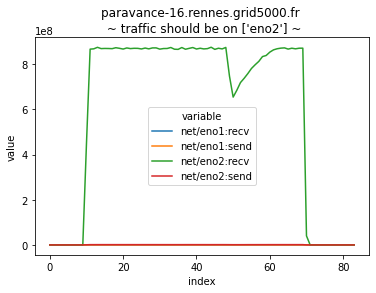

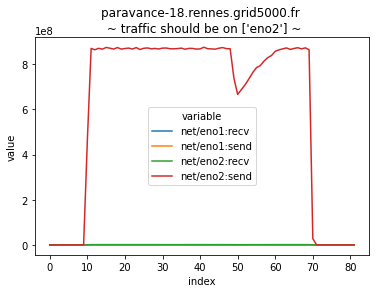

In [27]:
from itertools import product
import matplotlib.pyplot as plt 

for host, result in results.items():
    interfaces = host.filter_interfaces()
    # interfaces = [eno1, enos2]
    keys_in_csv = [fmt % interface for interface, fmt in product(interfaces, ["net/%s:recv", "net/%s:send"])]
    # keys_in_csv = ['net/eno2:recv', 'net/eno2:send', 'net/eno1:recv', 'net/eno1:send']
    print(keys_in_csv)
    plt.figure()
    # melt makes the data tidy
    # 0, {recv, send}, value_0
    # 1, {recv, send}, value_1
    sns.lineplot(data=result.melt(value_vars = keys_in_csv, ignore_index=False).reset_index(), x="index", y="value", hue="variable")
    plt.title(f"{host.alias} \n ~ traffic should be on {host.filter_interfaces(networks=networks['private'])} ~")

## Emulating the network conditions

We'll illustrate how network constraints can be set on specific network interfaces on the nodes of the experiment.
To do so EnOSlib provides two services:
- the Netem service which is a wrapper around [netem](https://wiki.linuxfoundation.org/networking/netem).
- the NetemHTB which provides a high level interface to finer grained [HTB network based emulation](https://tldp.org/HOWTO/Traffic-Control-HOWTO/classful-qdiscs.html)

More information can be found in the EnOSlib documentation:  https://discovery.gitlabpages.inria.fr/enoslib/apidoc/netem.

EnOSlib let's you set the constraint easily on a dedicated network by only specifying it with its logical name.

In [29]:
netem = en.Netem()
# symetric constraints:
# node1|10ms ---> 10ms|node2|10ms --> 10ms|node1
netem.add_constraints("delay 10ms", roles["xp"], symetric=True, networks=networks["private"])

device,direction,options
eno2,in,delay 10ms
eno2,out,delay 10ms
device,direction,options
eno2,in,delay 10ms
eno2,out,delay 10ms


In [30]:
netem.deploy()

Output()

Finished 1 tasks (Applying the network constraints)

─────────────────────────────────────────────────────────────────────────────────────────────

---
There's a convenient method that let you quickly check the network condition (at least the RTT latency)

In [31]:
netem.validate()

Output()

Finished 11 tasks (Gathering Facts,setup,utils : include,utils : Installing fping,utils : 
Uploading the host list,utils : Get the latencies between all the nodes,utils : Fetching the 
results)

─────────────────────────────────────────────────────────────────────────────────────────────

In [32]:
from pathlib import Path
server_alias = roles['server'][0].alias
print(server_alias)
print(Path(f"_tmp_enos_/{server_alias}.out").read_text())

print("...8<"*20)
client_alias = roles['client'][0].alias
print(client_alias)

print(Path(f"_tmp_enos_/{client_alias}.out").read_text())

paravance-16.rennes.grid5000.fr

172.16.96.16 : 0.020 0.023 0.014 0.025 0.025 0.014 0.025 0.014 0.025 0.025
172.16.96.18 : 0.099 0.165 0.165 0.169 0.187 0.169 0.186 0.169 0.173 0.176
10.24.6.18   : 40.3 40.4 40.4 40.4 40.4 40.4 40.4 40.4 40.4 40.4
10.24.6.16   : 0.014 0.022 0.013 0.024 0.026 0.024 0.013 0.024 0.018 0.024

       4 targets
       4 alive
       0 unreachable
       0 unknown addresses

       0 timeouts (waiting for response)
      40 ICMP Echos sent
      40 ICMP Echo Replies received
       0 other ICMP received

 0.013 ms (min round trip time)
 10.1 ms (avg round trip time)
 40.4 ms (max round trip time)
        9.062 sec (elapsed real time)

...8<...8<...8<...8<...8<...8<...8<...8<...8<...8<...8<...8<...8<...8<...8<...8<...8<...8<...
8<...8<

paravance-18.rennes.grid5000.fr

172.16.96.16 : 0.142 0.166 0.165 0.171 0.184 0.172 0.185 0.171 0.160 0.172
172.16.96.18 : 0.012 0.023 0.025 0.025 0.025 0.014 0.025 0.025 0.014 0.025
10.24.6.18   : 0.023 0.011 0.014 0.025 0.025 0.014 0.014 0.025 0.025 0.014
10.24.6.16   : 40.4 40.4 40.4 40.4 40.4 40.4 40.4 40.4 40.4 40.4

       4 targets
       4 alive
       0 unreachable
       0 unknown addresses

       0 timeouts (waiting for response)
      40 ICMP Echos sent
      40 ICMP Echo Replies received
       0 other ICMP received

 0.011 ms (min round trip time)
 10.2 ms (avg round trip time)
 40.4 ms (max round trip time)
        9.071 sec (elapsed real time)

## Clean

In [33]:
provider.destroy()

INFO     Reloading enoslib_several_networks from grenoble                ]8;id=859793;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py\g5k_api_utils.py]8;;\:]8;id=759396;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py#175\175]8;;\

INFO     Reloading enoslib_several_networks from lille                   ]8;id=496500;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py\g5k_api_utils.py]8;;\:]8;id=232447;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py#175\175]8;;\

INFO     Reloading enoslib_several_networks from luxembourg              ]8;id=65411;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py\g5k_api_utils.py]8;;\:]8;id=693803;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py#175\175]8;;\

INFO     Reloading enoslib_several_networks from lyon                    ]8;id=665687;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py\g5k_api_utils.py]8;;\:]8;id=47210;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py#175\175]8;;\

INFO     Reloading enoslib_several_networks from nantes                  ]8;id=75752;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py\g5k_api_utils.py]8;;\:]8;id=520233;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py#175\175]8;;\

INFO     Reloading enoslib_several_networks from rennes                  ]8;id=303283;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py\g5k_api_utils.py]8;;\:]8;id=176355;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py#175\175]8;;\

INFO     Reloading 1870628 from rennes                                   ]8;id=619636;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py\g5k_api_utils.py]8;;\:]8;id=26624;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py#180\180]8;;\

INFO     Reloading enoslib_several_networks from sophia                  ]8;id=991277;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py\g5k_api_utils.py]8;;\:]8;id=579163;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py#175\175]8;;\

INFO     Killing the job (rennes, 1870628)                               ]8;id=55226;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py\g5k_api_utils.py]8;;\:]8;id=681629;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py#261\261]8;;\